In [1]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from natsort import natsorted

In [102]:
# Set the path to the directory containing the image stacks
stack_dir = 'D:/Temperature_images/RAW_2023-07-10/Stacks/'

# Get a list of all TIFF files in the input directory
files = [f for f in os.listdir(stack_dir) if f.endswith('.tiff')]
print(files)

green_stack = tifffile.imread(os.path.join(stack_dir, files[1]))
red_stack = tifffile.imread(os.path.join(stack_dir, files[2]))
blue_stack = tifffile.imread(os.path.join(stack_dir, files[0]))

#Get length of image stacks
num_images_green = len(green_stack)
num_images_red = len(red_stack)
num_images_blue =len(blue_stack)
if num_images_green == num_images_red and num_images_blue:
    print("Equal stacks")
    num_images = num_images_green
else:
    print("unequal stacks")

print("stack=",num_images)

['stacked_blue_channel.tiff', 'stacked_green_channel.tiff', 'stacked_red_channel.tiff']
Equal stacks
stack= 35


In [ ]:
#CROP IMAGES IF NEEDED


In [32]:
#FOR OXYGEN CALIBRATION:Loop through all red/green pairs of images in the stacks an get the RED/GREEN intensity ratio
mean_red_intensity =[]
mean_green_intensity = []
mean_blue_intensity = []
red_green_ratio = []

for i in range(num_images):

    mean_red_intensity.append(np.mean(red_stack[i]))
    mean_green_intensity.append(np.mean(green_stack[i]))
    mean_blue_intensity.append(np.mean(blue_stack[i]))

    # Calculate the intensity ratio between the two images
    ratio = red_stack[i] / green_stack[i]
    red_green_ratio.append(ratio)


In [103]:
#FOR TEMPERATURE CALIBRATION: Loop through all red/blue pairs of images in the stacks an get the RED/BLUE intensity ratio
mean_red_intensity =[]
mean_green_intensity = []
mean_blue_intensity = []
std_red_intensity = []
std_green_intensity = []
std_blue_intensity =[]
red_blue_ratio = []
mean_red_blue_ratio =[]
red_blue_std = []

for i in range(num_images):

    mean_red_intensity.append(np.mean(red_stack[i]))
    mean_green_intensity.append(np.mean(green_stack[i]))
    mean_blue_intensity.append(np.mean(blue_stack[i]))
    std_red_intensity.append(np.std(red_stack[i]))
    std_green_intensity.append(np.std(green_stack[i]))
    std_blue_intensity.append(np.std(blue_stack[i]))

    # Calculate the intensity ratio between the two images
    ratio = red_stack[i] / blue_stack[i]
    mean_red_blue_ratio.append(np.mean(ratio))
    red_blue_ratio.append(ratio)
    red_blue_std.append(np.std(ratio))


In [104]:
# Define number of sections for each image to calculate mean ratios
num_sections = 3

# Calculate the height of each section
section_height = red_stack.shape[1] // num_sections

# Loop over eack image in the ratio stack and divide it into sections
ratio_section_means = []
ratio_sections = []

# CHANGE DEPENDING ON CALIBRATION
for image in red_blue_ratio:
    sections = [image[i*section_height:(i+1)*section_height, :] for i in range(num_sections)]
    ratio_sections.append(sections)

    # Calculate the mean ratio of eacjh section and append it to the list
    ratio_section_mean = [np.nanmean(section) for section in sections]
    ratio_section_means.append(ratio_section_mean)

# Reshape array of mean ratios to 
ratio_section_means = np.reshape(ratio_section_means, (-1, num_sections))
print(ratio_section_means)

[[3.91424385 4.04869333 4.02522481]
 [3.88905146 4.0321297  4.02208085]
 [3.76258937 3.92936018 3.94513766]
 [3.68231465 3.80211445 3.79184722]
 [3.66060492 3.75916823 3.72726836]
 [3.6706235  3.77857116 3.75459762]
 [3.66167706 3.7600723  3.72838498]
 [3.64633608 3.74888289 3.71871782]
 [3.60174904 3.70824063 3.67642781]
 [3.52632127 3.63730469 3.60067939]
 [3.45940067 3.56564942 3.52233224]
 [3.39103203 3.4973544  3.45619508]
 [3.33112368 3.4327969  3.39851019]
 [3.27646366 3.37460495 3.34238416]
 [3.22574357 3.32279392 3.29172901]
 [3.17601164 3.27273652 3.24240453]
 [3.12943049 3.22663229 3.19851156]
 [3.08697241 3.18257237 3.15603286]
 [3.04904018 3.14374804 3.11890239]
 [3.01707563 3.10883534 3.08347003]
 [2.99276747 3.08139402 3.0561917 ]
 [2.96724402 3.06080402 3.03497097]
 [2.94287383 3.03009817 3.0068408 ]
 [2.92123192 3.00833747 2.983716  ]
 [2.90442935 2.99029478 2.96545503]
 [2.88914342 2.97454146 2.9498596 ]
 [2.87495949 2.96020441 2.93543954]
 [2.86120343 2.94585164 2.92

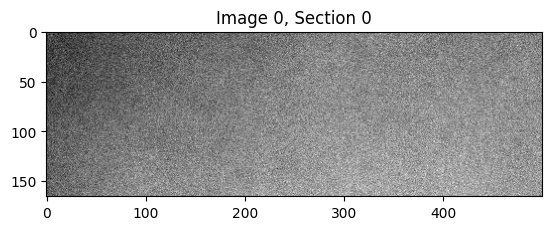

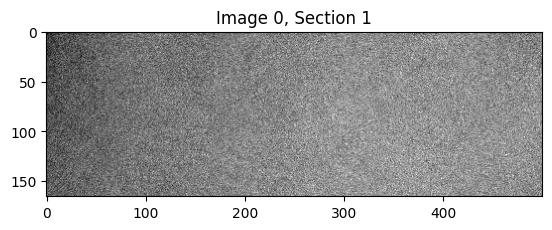

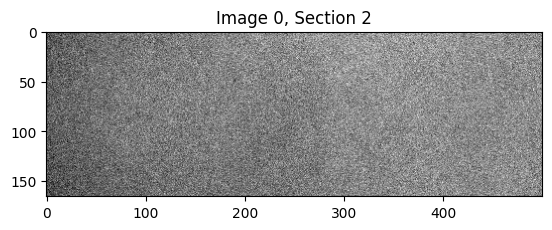

In [105]:
# Define the image index to show
image_idx = 0

# Get an example image from the green stack and its sections to see how its divided
image = red_stack[image_idx]
sections = ratio_sections[image_idx]

for section_idx in range(num_sections):
    section = sections[section_idx]
    plt.imshow(section, cmap="gray")
    plt.title(f'Image {image_idx}, Section {section_idx}')
    plt.show()


In [106]:
# Calculate the mean of means for each image and the standard deviation
ratio_mean_of_means = []
ratio_std_of_means =[]

for i in range(len(ratio_section_means)):
    mean_ratio = np.nanmean(ratio_section_means[i])
    std_ratio = np.nanstd(ratio_section_means[i])
    ratio_mean_of_means.append(mean_ratio)
    ratio_std_of_means.append(std_ratio)

print(ratio_mean_of_means)
print(ratio_std_of_means)

[3.9960539971922064, 3.981087338952449, 3.8790290673011416, 3.7587587748102105, 3.7156805039494096, 3.7345974288270134, 3.7167114467131124, 3.7046455977211203, 3.662139159659526, 3.5881017814928513, 3.515794109270393, 3.4481938325622417, 3.3874769252916734, 3.3311509215887227, 3.280088832344972, 3.230384229748559, 3.1848581156482276, 3.1418592128729212, 3.103896866897749, 3.06979366708865, 3.043451064699646, 3.021006338591105, 2.993270931978072, 2.971095130272013, 2.9533930538333837, 2.9378481585596625, 2.923534476338799, 2.909491364193988, 2.898322789915311, 2.888543592618832, 2.879843472919547, 2.8724631559176097, 2.8643215826565096, 2.8573554449445218, 2.850266490425587]
[0.05863655199352179, 0.06520836567475387, 0.08258686462921623, 0.054216428293726755, 0.041064101291222295, 0.04628304310648136, 0.04100901750533545, 0.04303085951016541, 0.04463361247372906, 0.04617341882955977, 0.04362154839078163, 0.043773100416935794, 0.04223474446643036, 0.04084578787659573, 0.04046655502823666

In [108]:
# Set the path to the directory containing the image filenames
files_dir = 'D:/Temperature_images/RAW_2023-07-10/'
files = [f for f in os.listdir(files_dir) if f.endswith('.tiff')]

# Sort filenames to match with stack index
files = natsorted(files)

# Initialize an empty dataframe
df_ratios = pd.DataFrame(columns=['Tempeartue/O2', 'Intensity Ratio', 'Intensity Red', 'Intensity Green', 'Intensity Blue', 'Std Ratio','Std Red','Std Green', 'Std Blue'])

# Add filenames and corresponding red/green ratio to the dataframe
for i in range(num_images):
    ratio_df = mean_red_blue_ratio[i]
    std_df = red_blue_std[i]
    blue_intensity = mean_blue_intensity[i]
    green_intensity = mean_green_intensity[i]
    red_intensity = mean_red_intensity[i]
    blue_std = std_blue_intensity[i]
    green_std = std_green_intensity[i]
    red_std = std_red_intensity[i]
    filename = os.path.splitext(files[i])[0][15:]
    numeric_num = float(filename.replace(",", ".")) 
    df_ratios.loc[i] = [numeric_num, ratio_df, red_intensity, green_intensity, blue_intensity, std_df, red_std, green_std, blue_std]

#df_ratios['Intensity Ratio'] = df_ratios['Intensity Ratio'].round(4)

# Print the dataframe
print(df_ratios)

    Tempeartue/O2  Intensity Ratio  Intensity Red  Intensity Green  \
0            2.70         3.996042    1734.788412      1958.473788   
1            3.17         3.981104    1726.997816      1953.681084   
2            3.95         3.879248    1662.708760      1896.540324   
3            4.18         3.758777    1592.986856      1834.721324   
4            4.28         3.715568    1560.852960      1805.339268   
5            4.36         3.734521    1572.642864      1816.007104   
6            4.57         3.716654    1561.960972      1806.976896   
7            5.36         3.704542    1555.174808      1801.609788   
8            7.01         3.662039    1529.429564      1778.501844   
9            8.41         3.588046    1485.248004      1738.528940   
10           9.76         3.515740    1443.750424      1702.431764   
11          10.99         3.448095    1405.115972      1667.927164   
12          12.10         3.387424    1370.956248      1637.635840   
13          13.09   

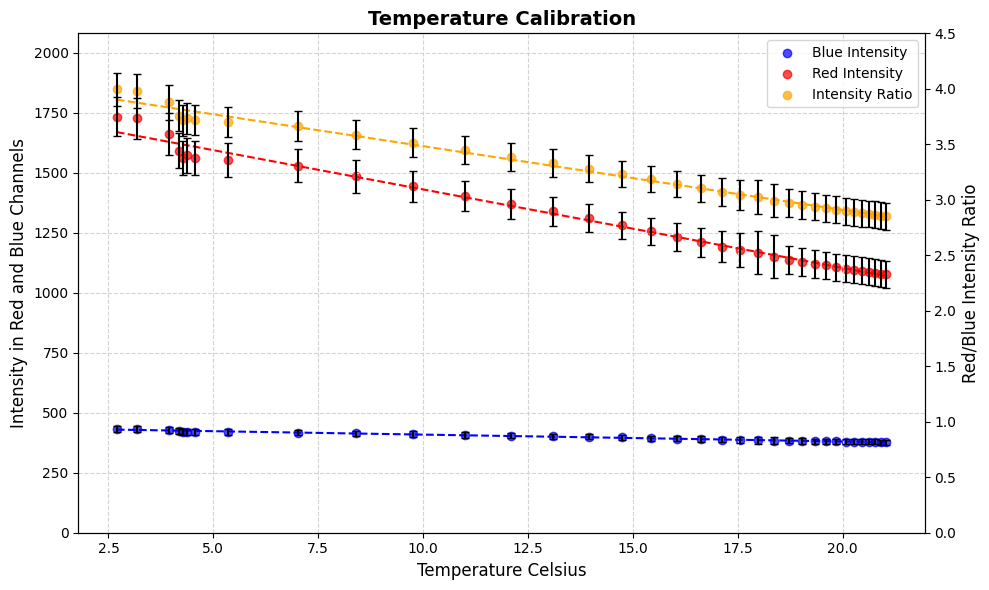

In [109]:
# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot blue and red intensity as scatter points with trendlines
blue_fit = np.polyfit(df_ratios['Tempeartue/O2'], df_ratios['Intensity Blue'], 1)
red_fit = np.polyfit(df_ratios['Tempeartue/O2'], df_ratios['Intensity Red'], 1)
ax1.scatter(df_ratios['Tempeartue/O2'], df_ratios['Intensity Blue'], color='blue', label='Blue Intensity', alpha=0.7)
ax1.plot(df_ratios['Tempeartue/O2'], np.polyval(blue_fit, df_ratios['Tempeartue/O2']), color='blue', linestyle='--')
ax1.errorbar(df_ratios['Tempeartue/O2'], df_ratios['Intensity Blue'], yerr=df_ratios['Std Blue'], color='black', fmt='none', capsize=3)
ax1.scatter(df_ratios['Tempeartue/O2'], df_ratios['Intensity Red'], color='red', label='Red Intensity', alpha=0.7)
ax1.plot(df_ratios['Tempeartue/O2'], np.polyval(red_fit, df_ratios['Tempeartue/O2']), color='red', linestyle='--')
ax1.errorbar(df_ratios['Tempeartue/O2'], df_ratios['Intensity Red'], yerr=df_ratios['Std Red'], color='black', fmt='none', capsize=3)
ax1.set_xlabel('Temperature Celsius', fontsize=12)
ax1.set_ylabel('Intensity in Red and Blue Channels', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)
ax1.set_ylim(0, 1.2 * max(df_ratios['Intensity Blue'].max(), df_ratios['Intensity Red'].max()))  # Adjust the y-axis limit as needed

# Create a secondary y-axis for intensity ratio
ax2 = ax1.twinx()
ratio_fit = np.polyfit(df_ratios['Tempeartue/O2'], df_ratios['Intensity Ratio'], 1)
ax2.scatter(df_ratios['Tempeartue/O2'], df_ratios['Intensity Ratio'], color='orange', label='Intensity Ratio', alpha=0.7)
ax2.plot(df_ratios['Tempeartue/O2'], np.polyval(ratio_fit, df_ratios['Tempeartue/O2']), color='orange', linestyle='--')
ax2.errorbar(df_ratios['Tempeartue/O2'], df_ratios['Intensity Ratio'], yerr=df_ratios['Std Ratio'], color='black', fmt='none', capsize=3)
ax2.set_ylabel('Red/Blue Intensity Ratio', fontsize=12)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_ylim(0, 4.5)  # Adjust the y-axis limit as needed

# Combine the legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=10)

# Set the title
plt.title('Temperature Calibration', fontsize=14, fontweight='bold')

# Add gridlines
ax1.grid(color='lightgray', linestyle='--')

# Adjust spacing
fig.tight_layout()

# Show the plot
plt.show()







In [42]:
# Create Scatterplot with errorbars
plt.errorbar(x=df_ratios['Air Saturation'], y=df_ratios['Intensity Ratio'], yerr=df_ratios['Std'], fmt='o')

plt.show()

KeyError: 'Air Saturation'

In [39]:
#Save the DataFrame as a CSV file
df_ratios.to_csv('D:/Temperature_images/RAW_2023-06-29/red_blue_ratio.CSV',header=True, index=False, decimal=',')